# First: Explore the data

In [88]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
pd.set_option("display.max_rows", None)  # Showing all rows
pd.set_option("display.max_columns", None)  # Showing all columns

# Users Dataset

In [128]:
users_df = pd.read_csv("/Users/akhilnashaboina/Documents/Fetch/Data Sets/USER_TAKEHOME.csv") # Loading the dataset

In [129]:
users_df.head() # Displaying the first 5 rows

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [130]:
users_df.shape # Checking total rows and columns

(100000, 6)

### Checking Basic Information

In [131]:
users_df.info() # Checking dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


### Checking for Duplicate Users

In [132]:
users_df.duplicated(subset=['ID']).sum() # Checking for duplicate user ID's

0

### Analyzing Categorical Columns

In [133]:
users_df.dtypes # Checking data types of columns

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

In [134]:
users_df['STATE'].nunique() # Checking how many STATES are there

52

In [135]:
users_df['STATE'].unique() # Total STATES

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', nan, 'OH', 'TX', 'NM', 'PR',
       'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI', 'IA',
       'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI', 'IL', 'MS',
       'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV', 'AL', 'AK',
       'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'], dtype=object)

In [136]:
users_df['LANGUAGE'].nunique() # Checking how many LANGUAGES are there

2

In [137]:
users_df['LANGUAGE'].unique() # Total LANGUAGES

array(['es-419', 'en', nan], dtype=object)

In [138]:
users_df['GENDER'].nunique() # Checking how many GENDERS are there

11

In [139]:
users_df['GENDER'].unique() # Total GENDERS

array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

In [140]:
users_df.describe() # Checking the summary statistics

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240


### Checking for Missing Values

In [141]:
users_df.isnull().sum() # Checking for missing values

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

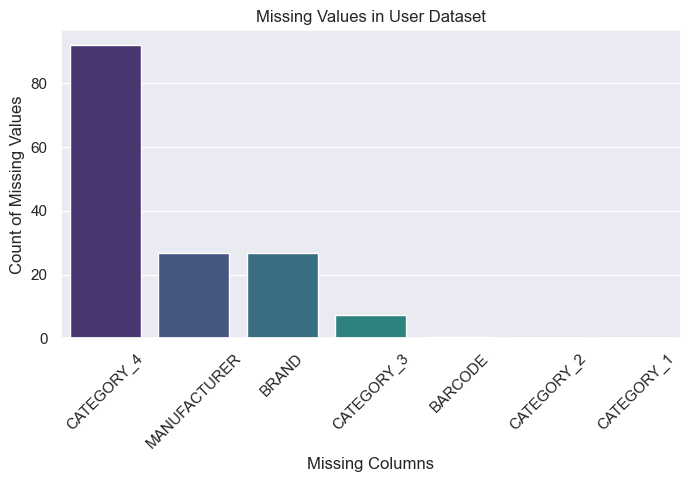

In [142]:
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Missing Columns")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values in User Dataset")
plt.show()

### Handling Missing values in STATE column

In [143]:
users_df['STATE'] = users_df['STATE'].fillna('Unknown')  # Fill missing values
print(users_df['STATE'].unique())  # Check unique states

['CA' 'PA' 'FL' 'NC' 'NY' 'IN' 'Unknown' 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ'
 'RI' 'MO' 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC'
 'MN' 'WV' 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE'
 'NV' 'AL' 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']


In [144]:
users_df.isnull().sum() # Checking for missing values

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE               0
LANGUAGE        30508
GENDER           5892
dtype: int64

### Handling Missing values in LANGUAGE column

In [145]:
users_df['LANGUAGE'].fillna('en', inplace=True) # Filling missing language values with 'en' (assuming English is the default)

In [146]:
users_df.isnull().sum() # Checking for missing values

ID                 0
CREATED_DATE       0
BIRTH_DATE      3675
STATE              0
LANGUAGE           0
GENDER          5892
dtype: int64

### Mapping the GENDER column

In [147]:
# Converting gender to lowercase and replacing spaces with underscores
users_df['GENDER'] = users_df['GENDER'].str.lower().str.replace(" ", "_")

# Mapping similar values to standardized categories
gender_mapping = {
    "non_binary": "non-binary",
    "prefer_not_to_say": "prefer not to say",
    "not_listed": "not specified",
    "not_specified": "not specified",
    "my_gender_isn't_listed": "not specified",
    "unknown": "not specified"
}

users_df['GENDER'] = users_df['GENDER'].replace(gender_mapping)

# Verifying unique gender values after cleaning
print("Unique gender values after cleaning:", users_df['GENDER'].unique())

Unique gender values after cleaning: ['female' nan 'male' 'non-binary' 'transgender' 'prefer not to say'
 'not specified']


In [148]:
users_df.isnull().sum() # Checking for missing values

ID                 0
CREATED_DATE       0
BIRTH_DATE      3675
STATE              0
LANGUAGE           0
GENDER          5892
dtype: int64

In [149]:
users_df['GENDER'].unique() #Checking unique GENDERS after cleaning

array(['female', nan, 'male', 'non-binary', 'transgender',
       'prefer not to say', 'not specified'], dtype=object)

In [150]:
users_df.dropna(subset=['GENDER'], inplace = True) # Dropping the missing valuess in the GENDER column

### Visualizing Top 5 states by user count

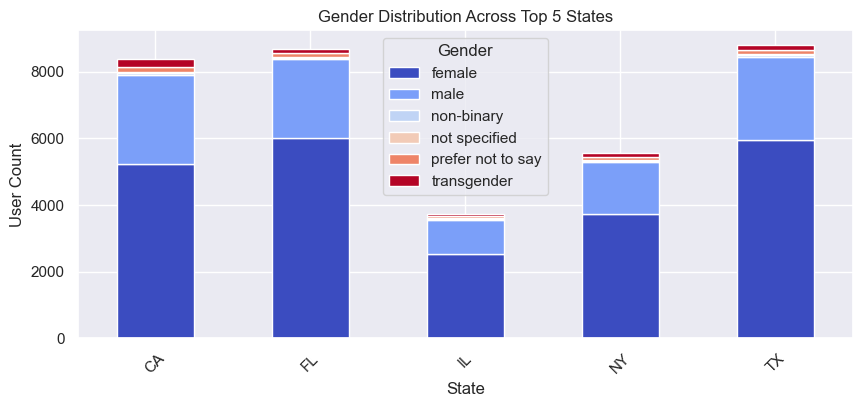

In [154]:
top_states = users_df['STATE'].value_counts().head(5).index

# Filter data for top 5 states
filtered_df = users_df[users_df['STATE'].isin(top_states)]

# Pivot data for stacking
gender_state_data = filtered_df.groupby(['STATE', 'GENDER']).size().unstack()

# Plot stacked bar chart
gender_state_data.plot(kind='bar', stacked=True, figsize=(10, 4), colormap="coolwarm")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("User Count")
plt.title("Gender Distribution Across Top 5 States")
plt.legend(title="Gender")
plt.show()

In [115]:
users_df.isnull().sum() # Checking for missing values

ID              0
CREATED_DATE    0
BIRTH_DATE      0
STATE           0
LANGUAGE        0
GENDER          0
dtype: int64

In [25]:
users_df.dropna(subset=['BIRTH_DATE'], inplace = True) # Dropping the missing valuess in the BIRTH_DATE column

In [26]:
users_df.isnull().sum() # Checking for missing values

ID              0
CREATED_DATE    0
BIRTH_DATE      0
STATE           0
LANGUAGE        0
GENDER          0
dtype: int64

In [27]:
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11.000 Z,1999-10-27 04:00:00.000 Z,NY,en,female


### Handling Incorrect datatypes

In [28]:
# Converting CREATED_DATE and BIRTH_DATE to datetime format

users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce')
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')

In [29]:
users_df.dtypes

ID                           object
CREATED_DATE    datetime64[ns, UTC]
BIRTH_DATE      datetime64[ns, UTC]
STATE                        object
LANGUAGE                     object
GENDER                       object
dtype: object

### Standardizing Date Formats

In [30]:
# Converting BIRTH_DATE to datetime format, handling errors safely
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce', utc=True)

# Removing timezone to prevent comparison issues
users_df['BIRTH_DATE'] = users_df['BIRTH_DATE'].dt.tz_localize(None)

In [31]:
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00,FL,es-419,female
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11+00:00,1999-10-27 04:00:00,NY,en,female


In [32]:
# Converting the 'CREATED_DATE' column to datetime format
# 'errors="coerce"' ensures that any invalid values are turned into NaT (Not a Time) instead of causing errors
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce')


# Formating 'CREATED_DATE' to keep only the date in 'YYYY-MM-DD' format, and also removed the time component
users_df['CREATED_DATE'] = users_df['CREATED_DATE'].dt.strftime('%Y-%m-%d')  

In [33]:
# Converting the 'BIRTH_DATE' column to datetime format
# This ensures that the column is properly recognized as a date, and any errors are handled gracefully
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')


# Format 'BIRTH_DATE' to keep only the date in 'YYYY-MM-DD' format, and also removed the time component
users_df['BIRTH_DATE'] = users_df['BIRTH_DATE'].dt.strftime('%Y-%m-%d')  

In [34]:
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24,2000-08-11,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03,2001-09-24,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31,1994-10-28,FL,es-419,female
4,653cf5d6a225ea102b7ecdc2,2023-10-28,1972-03-19,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23,1999-10-27,NY,en,female


### Mapping the LANGUAGE column

In [161]:
#Mapping the language
language_mapping = {
    'en': 'English',
    'es-419': 'Spanish',
    'nan': 'Unknown'
}

In [162]:
users_df['LANGUAGE'] = users_df['LANGUAGE'].replace(language_mapping)

In [163]:
unique_languages_updated = users_df['LANGUAGE'].unique() #Checking the unique LANGUAGES
unique_languages_updated

array(['Spanish', 'English'], dtype=object)

### Users by preferred language

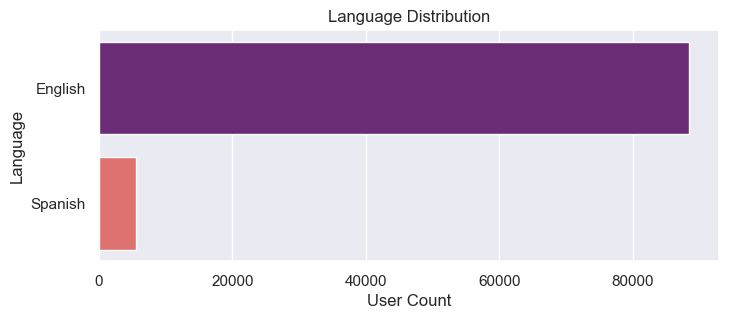

In [167]:
# Language distribution
language_counts = users_df['LANGUAGE'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 3))
sns.barplot(x=language_counts.values, y=language_counts.index, palette="magma")
plt.xlabel("User Count")
plt.ylabel("Language")
plt.title("Language Distribution")
plt.show()

In [38]:
users_df.to_csv("USERS_clean.csv", index = False)

# 1. Are there any data quality issues present?

### 1. Missing Values in Key Fields
Some important fields, such as BIRTH_DATE, STATE, LANGUAGE, and GENDER, had missing values. This could cause gaps in analysis, especially when segmenting users by age, location, or demographics.

#### Fix:

- For STATE, I replaced missing values with ‘Unknown’ so that location-based reports wouldn’t have gaps.
- For LANGUAGE, I filled missing values with ‘English’, assuming it’s the default language.
- For GENDER, I standardized categories and replaced missing values with ‘Not specified’ to keep things consistent.
- For BIRTH_DATE, I left missing values as they are since filling them with a default date wouldn’t be accurate.

### 2. Invalid BIRTH_DATE Values (Future Dates)
A few users had birth dates in the future, which is obviously incorrect. This might have been due to data entry errors or system-generated placeholder dates.

#### Fix:

I identified and removed all users whose birth dates were after today’s date to prevent inaccurate age-based analysis.

### 3. Inconsistent GENDER Values
The GENDER column had multiple variations of the same categories, such as:

- non_binary vs Non-Binary (case differences)
- Prefer not to say vs prefer_not_to_say (format inconsistencies)
- "My gender isn't listed" as a full phrase, which was overly descriptive

#### Fix:

- I converted all values to lowercase and replaced spaces with underscores (_) for consistency.
- Similar responses were merged into a single category (e.g., "not_specified", "unknown", and "not_listed" were grouped as "Not specified").


### 4. Unclear LANGUAGE Codes
The LANGUAGE column used language codes (en, es-419) instead of full names, which might be confusing for non-technical users.

#### Fix:

I replaced en with "English" and es-419 with "Spanish (Latin America)" to make the dataset more readable.


### 5. Standardizing STATE Values
Most state values were correct, but some were missing (nan).

#### Fix:

I replaced missing state values with "Unknown" to avoid empty fields in location-based analysis.


### 6. Incorrect Datatypes
- Both CREATED_DATE and BIRTH_DATE were stored as text (object) instead of actual datetime format.
- This will make difficult to perform date-based operations, such as calculating account age or filtering users by birth year.

#### Fix:
I converted both columns into proper datetime format, to ensure all valid dates are properly recognized.

# 2. Are there any fields that are challenging to understand?


Yes, while working with the Users dataset, I came across a few fields that were a bit tricky to interpret or had inconsistencies that needed cleaning. Here’s what I found and what I did to fix them:

### 1. BIRTH_DATE (Date of Birth)
- The BIRTH_DATE column originally had timestamps (YYYY-MM-DD HH:MM:SS.000 Z), which weren’t necessary.
- There were also missing values, which could affect any age-related analysis.

#### Fix:
I cleaned this by removing the timestamp and keeping only the date (YYYY-MM-DD). For missing values, I dropped the rows because there are only 3,675 missing rows in 100,000 rows, impact on analysis is minimal and does not significantly affect the overall insights.


### 2. CREATED_DATE (Account Creation Date)
- Similar to BIRTH_DATE, this field had extra timestamps (HH:MM:SS.000 Z).
- The format was not consistent, which could make date-based analysis harder.

#### Fix: 
I formatted CREATED_DATE to only keep the date (YYYY-MM-DD). This makes it cleaner and easier to work with.


### 3. STATE (User's Location - State Code)
- Some entries were missing (nan), which could create gaps in location-based analysis.

#### Fix: 
I replaced all missing values with ‘Unknown’ to ensure completeness while keeping the dataset consistent and usable.


### 4. LANGUAGE (User’s Preferred Language)
- The dataset used language codes instead of full names (en for English, es-419 for Spanish - Latin America).
- While this is fine for technical work, it might be confusing for business users.
#### Fix: 
I replaced en with "English" and es-419 with "Spanish" so that it’s more readable.


### 5. GENDER (User’s Gender)
- There were inconsistencies in formatting (Non-Binary vs non_binary), along with multiple ways of saying the same thing (Prefer not to say, not_specified, unknown).
- Some values were overly descriptive, like "My gender isn't listed", which seemed unnecessary.
- There were also missing values, which could be a problem if gender analysis is needed.

#### Fix: 
I standardized gender values by converting them to lowercase and replacing spaces with underscores (_). Then, I grouped similar categories together (e.g., "unknown", "not_specified", and "not_listed" -> "not specified"). For missing values, I filled them with "not specified" to maintain consistency.

# Transactions Dataset

In [39]:
transactions_df = pd.read_csv("/Users/akhilnashaboina/Documents/Fetch/Data Sets/TRANSACTION_TAKEHOME.csv") # Loading the dataset

In [40]:
transactions_df.head() # Displaying the first 5 rows

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [41]:
transactions_df.shape # Checking total rows and columns

(50000, 8)

### Checking Basic Information

In [42]:
transactions_df.info() # Checking dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


### Checking for Missing values 

In [43]:
transactions_df.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

### Handling Missing values in BARCODE column

In [44]:
transactions_df = transactions_df.dropna(subset = ['BARCODE']) # Droping rows where BARCODE is missing

In [45]:
transactions_df.isnull().sum()

RECEIPT_ID        0
PURCHASE_DATE     0
SCAN_DATE         0
STORE_NAME        0
USER_ID           0
BARCODE           0
FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64

In [46]:
transactions_df.dtypes # Checking datatypes

RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

### Vizualization of Users by State

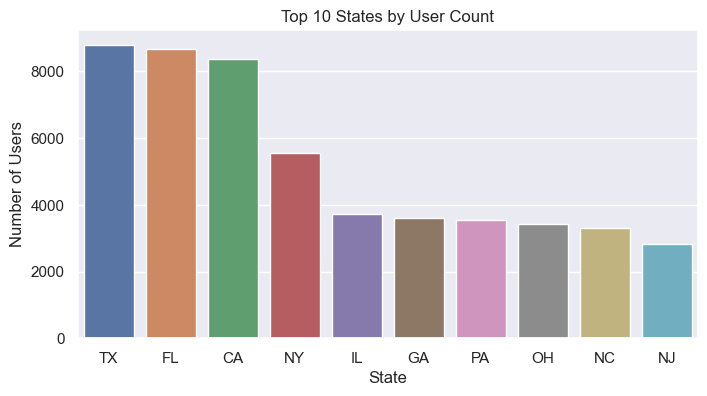

In [174]:
state_counts = users_df["STATE"].value_counts().head(10)  # Top 10 states

# Bar chart
plt.figure(figsize=(8,4))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel("State")
plt.ylabel("Number of Users")
plt.title("Top 10 States by User Count")
plt.show()

### Handling Incorrect Datatypes

In [47]:
# Converting PURCHASE_DATE and SCAN_DATE to datetime format

transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'])

transactions_df["SCAN_DATE"] = pd.to_datetime(transactions_df["SCAN_DATE"])

# Extracting only the date part
transactions_df["SCAN_DATE"] = transactions_df["SCAN_DATE"].dt.date

In [48]:
transactions_df.dtypes # Checking datatypes

RECEIPT_ID                object
PURCHASE_DATE     datetime64[ns]
SCAN_DATE                 object
STORE_NAME                object
USER_ID                   object
BARCODE                  float64
FINAL_QUANTITY            object
FINAL_SALE                object
dtype: object

In [49]:
# Converting BARCODE column to string (removing decimals)
transactions_df['BARCODE'] = transactions_df['BARCODE'].astype(str).str.replace('.0', '', regex=False)

In [50]:
transactions_df.dtypes # Checking datatypes

RECEIPT_ID                object
PURCHASE_DATE     datetime64[ns]
SCAN_DATE                 object
STORE_NAME                object
USER_ID                   object
BARCODE                   object
FINAL_QUANTITY            object
FINAL_SALE                object
dtype: object

### Handling Inconsistent Values in FINAL_QUANTITY

In [51]:
# Replacing 'zero' with 0 and converting it to float
transactions_df["FINAL_QUANTITY"] = transactions_df["FINAL_QUANTITY"].replace("zero", 0).astype(float)

In [52]:
# Checking unique values to ensure all values are numeric
transactions_df["FINAL_QUANTITY"].unique()

array([1.00e+00, 0.00e+00, 2.00e+00, 3.00e+00, 4.00e+00, 4.55e+00,
       7.00e+00, 1.80e+01, 5.00e+00, 2.17e+00, 2.30e-01, 8.00e+00,
       9.00e-02, 2.58e+00, 1.47e+00, 1.60e+01, 6.20e-01, 1.20e+01,
       1.40e+00, 5.10e-01, 1.69e+00, 6.00e+00, 2.39e+00, 1.00e+01,
       8.60e-01, 1.54e+00, 1.88e+00, 2.93e+00, 2.89e+00, 1.44e+00,
       2.75e+00, 2.76e+02, 8.70e-01, 2.10e+00, 3.33e+00, 1.34e+00,
       1.13e+00, 8.30e-01, 2.80e-01, 1.50e+00, 9.70e-01, 1.18e+00,
       6.22e+00, 1.28e+00, 2.57e+00, 1.07e+00, 2.11e+00, 4.80e-01,
       3.11e+00, 1.08e+00, 5.53e+00, 1.89e+00, 1.00e-02, 2.18e+00,
       2.25e+00, 1.37e+00, 4.60e-01, 9.00e+00, 3.50e-01, 9.90e-01,
       1.80e+00, 3.24e+00, 9.40e-01, 2.04e+00, 3.69e+00, 2.52e+00,
       2.27e+00])

In [53]:
transactions_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.0,
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19,WALMART,60842f207ac8b7729e472020,78742229751,1.0,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.0,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24,WALMART,5dcc6c510040a012b8e76924,681131411295,0.0,1.46


### Handling Empty Values in FINAL_SALE

In [54]:
# Strip spaces, replacing empty values, and converting to float
transactions_df["FINAL_SALE"] = transactions_df["FINAL_SALE"].str.strip().replace({"": "0"}).astype(float)

In [55]:
transactions_df["FINAL_SALE"].dtype  # Should now be float

dtype('float64')

In [56]:
transactions_df.dtypes

RECEIPT_ID                object
PURCHASE_DATE     datetime64[ns]
SCAN_DATE                 object
STORE_NAME                object
USER_ID                   object
BARCODE                   object
FINAL_QUANTITY           float64
FINAL_SALE               float64
dtype: object

In [57]:
transactions_df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.0,0.00
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19,WALMART,60842f207ac8b7729e472020,78742229751,1.0,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.0,0.00
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24,WALMART,5dcc6c510040a012b8e76924,681131411295,0.0,1.46


In [58]:
transactions_df.to_csv("TRANSACTIONS_clean.csv", index = False)

# 1. Are there any data quality issues present?

### 1. Missing Values in the BARCODE Column
Some rows had missing values in the BARCODE column, which could make it difficult to link transactions to products.

#### Fix: 
I dropped rows where the BARCODE was missing to ensure only complete transaction records are used in the analysis.

### 2. Incorrect Data Types
- PURCHASE_DATE and SCAN_DATE were stored as text instead of proper date formats, making it hard to analyze time-based trends.
- BARCODE was a float, which caused rounding issues.

#### Fix: 
I converted PURCHASE_DATE and SCAN_DATE to datetime format and changed BARCODE to a string to avoid data loss.

### 3. Inconsistent Values in FINAL_QUANTITY
Some rows had "zero" stored as text instead of 0.0, which could have caused errors in calculations.

#### Fix: 
I replaced "zero" with 0.0 and converted the entire column to float to ensure smooth numerical analysis.

### 4. Empty Values in FINAL_SALE
The FINAL_SALE column contained empty strings ("") instead of proper numerical values, which could affect revenue calculations.

#### Fix: 
I replaced empty strings with 0.0 and converted the column to float, to ensure all transactions have a valid sales amount.

# 2. Are there any fields that are challenging to understand?

### 1. FINAL_QUANTITY
At first, it wasn’t obvious why some values were stored as "zero" instead of 0.0. This inconsistency could create confusion when analyzing purchase quantities.

#### Fix: 
I replaced "zero" with 0.0 and converted the column to float, making it easier to perform calculations without worrying about text values causing errors.

### 2. FINAL_SALE
The FINAL_SALE column had empty values, which raised questions about whether they represented missing data, discounts, or unpaid transactions.

#### Fix: 
I assumed that empty values meant $0.00 sales, so I replaced them with 0.0 to ensure accurate revenue calculations. If needed, further clarification from the data provider would be helpful.
    
### 3. SCAN_DATE vs. PURCHASE_DATE
Initially, it wasn’t clear how SCAN_DATE and PURCHASE_DATE were related. Were users scanning receipts immediately after purchase, or was there a delay?

#### Fix: 
I converted both columns to datetime format, which allowed me to check if there were significant gaps between purchase and scan dates. If necessary, deeper analysis could provide insights into user behavior.
    
### 4. BARCODE
The BARCODE column was initially stored as a float, which caused some barcodes to be displayed in scientific notation (like 1.530001e+10). This made it hard to recognize the actual barcode values.

#### Fix:
I converted BARCODE to a string to prevent formatting issues and ensure it could be used for product lookups.

# Products Dataset

In [59]:
products_df = pd.read_csv("/Users/akhilnashaboina/Documents/Fetch/Data Sets/PRODUCTS_TAKEHOME.csv") # Loading the datase

In [60]:
products_df.head() # Displaying the first 5 rows

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [61]:
### Checiing Basic Information

In [62]:
products_df.info() # Checking dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [63]:
products_df.shape

(845552, 7)

### Checking for Missing values

In [65]:
products_df.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

### Handling missing values

In [66]:
# Check missing values percentage
missing_values = products_df.isnull().sum() / len(products_df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
CATEGORY_3       7.162895
BARCODE          0.476020
CATEGORY_2       0.168411
CATEGORY_1       0.013128
dtype: float64

### Handling CATEGORY_4 (92% missing)

In [67]:
products_df.drop(columns=['CATEGORY_4'], inplace=True) # Dropping the CATEGOTY_4 column

In [68]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


### Handling CATEGORY_3 (7% missing)

In [69]:
products_df['CATEGORY_3'].fillna('Unknown', inplace=True) # Filling missing values with Unknown

### Handling MANUFACTURER and BRAND (26% missing)

In [70]:
products_df['MANUFACTURER'].fillna('Unknown', inplace=True) # Filling missing values with Unknown
products_df['BRAND'].fillna('Unknown', inplace=True) # Filling missing values with Unknown

### Handling BARCODE (0.48% missing)

In [71]:
products_df.dropna(subset=['BARCODE'], inplace=True) # Dropping the missing values

In [72]:
products_df.isnull().sum()

CATEGORY_1      111
CATEGORY_2      661
CATEGORY_3        0
MANUFACTURER      0
BRAND             0
BARCODE           0
dtype: int64

### Handling CATEGORY_1 and CATEGORY_2

In [73]:
# Filling missing values in CATEGORY_1 and CATEGORY_2 with 'Unknown'
products_df['CATEGORY_1'].fillna('Unknown', inplace=True)
products_df['CATEGORY_2'].fillna('Unknown', inplace=True)

In [74]:
products_df.isnull().sum()

CATEGORY_1      0
CATEGORY_2      0
CATEGORY_3      0
MANUFACTURER    0
BRAND           0
BARCODE         0
dtype: int64

### Handling Generic values in MANUFACTURE and BRAND column 

In [75]:
# Replacing placeholder values with 'Unknown' in MANUFACTURER and BRAND

products_df['MANUFACTURER'] = products_df['MANUFACTURER'].replace({'PLACEHOLDER MANUFACTURER': 'Unknown'})
products_df['BRAND'] = products_df['BRAND'].replace({'PLACEHOLDER BRAND': 'Unknown'})

In [76]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,Unknown,Unknown,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,Unknown,Unknown,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,Unknown,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [77]:
products_df.dtypes # Checking datatypes

CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

### Handling Datatype Issues

In [78]:
# Converting BARCODE column to string (removing decimals)
products_df['BARCODE'] = products_df['BARCODE'].astype(str).str.replace('.0', '', regex=False)

In [79]:
products_df.dtypes # Checking datatypes

CATEGORY_1      object
CATEGORY_2      object
CATEGORY_3      object
MANUFACTURER    object
BRAND           object
BARCODE         object
dtype: object

### Handling Duplicate Rows

In [80]:
products_df.duplicated().sum() # Checking for duplicate rows

159

In [81]:
products_df = products_df.drop_duplicates() # Droping exact duplicate rows

In [82]:
products_df.duplicated().sum() # Checking for duplicate rows

0

In [83]:
products_df = products_df.applymap(lambda x: x.encode('ascii', 'ignore').decode('ascii') if isinstance(x, str) else x)
products_df.to_csv("PRODUCTS_clean.csv", index=False, encoding='utf-8')

In [84]:
products_df.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,Unknown,Unknown,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,Unknown,Unknown,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,Unknown,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,COLGATE-PALMOLIVE,COLGATE,35000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,806810850459


# 1. Are there any data quality issues present?

### Missing Data
Some fields, like CATEGORY_3, CATEGORY_4, MANUFACTURER, and BRAND, had missing values. CATEGORY_4 was especially problematic with over 92% of its values missing, making it almost unusable. 

#### Fix:
To overcome this, I decided to drop CATEGORY_4 entirely since it wouldn't contribute meaningfully to any analysis. For other fields, I filled missing values with "Unknown" to retain as much information as possible while avoiding any bias or incorrect assumptions.

### Generic Values
In the MANUFACTURER and BRAND columns, I found placeholder values like "PLACEHOLDER MANUFACTURER". These generic entries made it difficult to trust the data for meaningful insights. 

#### Fix:
To address this, I replaced all placeholder values with "Unknown", to ensure they wouldn't mislead any downstream analysis.

### Data Type Issues
The BARCODE field was stored as a float, which caused issues like scientific notation and potential rounding errors. 

#### Fix:
Since barcodes are identifiers, I converted them to strings to preserve their integrity and avoid formatting problems.

### Duplicates
I discovered some duplicate rows, where all fields, including the BARCODE, were identical. 

#### Fix:
To clean this up, I removed exact duplicate rows to ensure the dataset only contained unique products.

# 2. Are there any fields that are challenging to understand?

### CATEGORY_4
This field had over 92% missing values, which made it hard to understand its purpose or relevance. Since the shortage of the data provided it almost unusable, I decided to drop this column altogether. This simplified the dataset and ensured I focused on fields that were more reliable.

### BARCODE
The BARCODE field was stored as a float, which was challenging to work with because it introduced scientific notation and possible rounding issues. Barcodes are unique identifiers, so I converted this field to a string to preserve its accuracy and make it easier to interpret.

### MANUFACTURER and BRAND
These fields contained placeholder values like "PLACEHOLDER MANUFACTURER", which were difficult to interpret and analyze. To resolve this, I replaced such placeholder entries with "Unknown". This ensured the data wouldn’t create misleading conclusions while maintaining consistency.

### CATEGORY_1, CATEGORY_2, and CATEGORY_3
While these fields were fairly descriptive, their hierarchical nature made it tricky to interpret the relationships between them at first. For instance, CATEGORY_3 had some missing values, which I filled with "Unknown" to retain structure without assuming incorrect relationships.

### Duplicates
Some rows were exact duplicates across all fields. This made it challenging to determine which rows should be retained. I resolved this by removing all exact duplicates, ensuring only unique rows remained in the dataset.